In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df_train = pd.read_csv("train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [9]:
df_test = pd.read_csv("test_data.txt", sep=':::', names=[ 'Title', 'Description'], engine='python')

In [11]:
df_train.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [13]:
df_test.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [15]:
df_train.shape

(54214, 3)

In [17]:
df_test.shape

(54200, 2)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [23]:
df_train.duplicated().sum()

0

In [25]:
df_test.duplicated().sum()

0

In [27]:
df_train['Genre'].value_counts()

Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

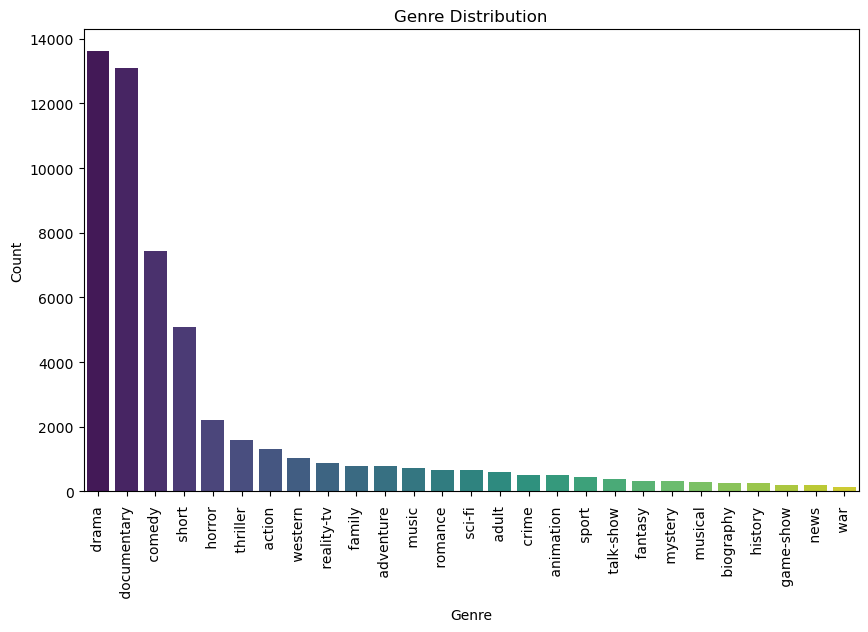

In [29]:
# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=df_train,palette='viridis',order=df_train['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [31]:
df_train['num_char_D']= df_train['Description'].apply(len)
df_test['num_char_D']= df_test['Description'].apply(len)

In [33]:
df_train['num_char_T']= df_train['Title'].apply(len)
df_test['num_char_T']= df_test['Title'].apply(len)

In [35]:
#  number of words
df_train['num_words_D']= df_train['Description'].apply(lambda x:len(nltk.word_tokenize(x)))
df_test['num_words_D']= df_test['Description'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
df_train['num_char_T']= df_train['Title'].apply(lambda x:len(nltk.word_tokenize(x)))
df_test['num_char_T']= df_test['Title'].apply(lambda x : len(nltk.word_tokenize(x)))

In [37]:
df_train.head()

,Title,Genre,Description,num_char_D,num_char_T,num_words_D
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,8,105
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,4,34
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,8,129
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,6,216
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,5,115


In [41]:
df_test.head()

,Title,Description,num_char_D,num_char_T,num_words_D
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",510,6,108
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",674,7,137
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,590,7,105
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",681,6,137
5,Er nu zhai (1955),Before he was known internationally as a mart...,814,6,169


In [43]:
df_train['num_sen_D']=df_train['Description'].apply(lambda x:len(nltk.sent_tokenize(x)))
df_test['num_sen_D']=df_test['Description'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [45]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def transform_Description_nltk(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize and filter out stop words and punctuation
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

# Assuming df_train and df_test are already defined and contain the 'Description' column
df_train['transformed_Des'] = df_train['Description'].apply(transform_Description_nltk)
df_test['transformed_Des'] = df_test['Description'].apply(transform_Description_nltk)


In [48]:
import re
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text_nltk(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(' +', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Lemmatize and remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply the preprocessing function to the 'Description' column
df_train['Cleaned_Des'] = df_train['Description'].apply(preprocess_text_nltk)
df_test['Cleaned_Des'] = df_test['Description'].apply(preprocess_text_nltk)


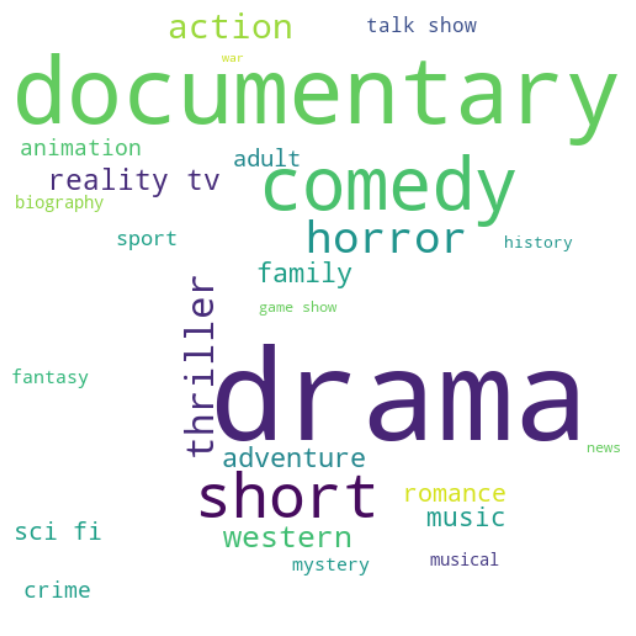

In [49]:
genre_text= ' '.join(df_train['Genre'])
wc=WordCloud(width=500,height=500,background_color='white',max_words=100).generate(genre_text)
plt.figure(figsize=(10,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [55]:
tfv=TfidfVectorizer()


In [57]:
#  Fit and transform the training data
X_train = tfv.fit_transform(df_train['Description'])

# Transform the test data
X_test = tfv.transform(df_test['Description'])

In [59]:
# Split the data into training and validation sets
X = X_train
y = df_train['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.44507977497002676
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.57      0.03      0.06      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.89      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.0